In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df[df == '?'] = np.nan

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
# the columns 'worrkclass', 'occupation', and 'native.country' are having null values

In [8]:
df['workclass'].mode()

0    Private
Name: workclass, dtype: object

In [9]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native.country'].fillna(df['native.country'].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

# Preprocessing & Feature Engineering

In [ ]:
## Encoding the categorical variables

In [13]:
X = df.drop(columns = ['income'], axis=1)
y = df['income']

In [14]:
encode = LabelEncoder()
encode.fit_transform(y)

array([0, 0, 0, ..., 1, 0, 0])

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.33, random_state = 0)

In [39]:

cat_cols = ['workclass','education', 'marital.status','occupation', 'relationship','race','sex','native.country']
for col in cat_cols:
    x_train[col] = encode.fit_transform(x_train[col])
    x_test[col] = encode.fit_transform(x_test[col])

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [41]:
scaler = StandardScaler()

In [42]:
#X_scaled = scaler.fit_transform(df[['age','fnlwgt','education.num','hours.per.week']])
x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=X.columns)

In [43]:
#X_scaled_test = pd.DataFrame(X_scaled,columns=['age','fnlwgt','education.num','hours.per.week'])
x_test = pd.DataFrame(scaler.fit_transform(x_test),columns=X.columns)

In [44]:
x_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,-0.409660,-0.090367,-1.036825,0.444096,1.523256,-0.403830,0.729616,-0.899669,0.391820,0.698905,-0.145264,-0.216386,0.367588,0.262348
1,1.786205,1.709137,-0.398307,-0.331706,1.134230,-0.403830,1.233305,-0.899669,0.391820,0.698905,-0.145264,-0.216386,-0.852936,0.262348
2,-0.409660,-0.090367,-0.226330,0.185495,-0.421874,-0.403830,0.225927,-0.899669,-1.967101,0.698905,-0.145264,-0.216386,-0.039254,0.262348
3,-0.043682,-0.090367,0.131750,-0.590306,0.356178,0.925612,1.485150,-0.277718,0.391820,-1.430809,0.176158,-0.216386,-0.039254,0.262348
4,1.054250,-0.090367,-0.889656,0.185495,-0.421874,-0.403830,0.729616,-0.899669,0.391820,0.698905,-0.145264,-0.216386,0.123483,0.262348


In [46]:
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)

In [49]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred = log_reg.predict(x_test)

In [51]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8196538246789503

In [49]:
from sklearn.decomposition import PCA
pca = PCA()

In [50]:
x_train = pca.fit_transform(x_train)
pca.explained_variance_ratio_

array([0.14778335, 0.10186725, 0.08129769, 0.07890465, 0.07445202,
       0.07268934, 0.07012146, 0.06771948, 0.06484157, 0.06128516,
       0.06072288, 0.04834764, 0.04263448, 0.02733302])

In [24]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[7652,  480],
       [1458, 1156]], dtype=int64)

In [25]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [26]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.940973930152484

In [52]:
from sklearn.svm import SVC

In [53]:
svm=SVC(kernel='linear', random_state=0)

In [54]:
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [55]:
svmscore= svm.score(x_train,y_train)
svmscore

0.8176025670410269

In [ ]:
## Model Evaluation

In [56]:
svm_eval = svm.predict(x_test)

In [57]:
accuracy_svm = accuracy_score(y_test,svm_eval)
accuracy_svm

0.8150009305788201

In [ ]:
## SVM is NOT giving better accuracy

In [58]:
svm_confusion_matrix = confusion_matrix(y_test,svm_eval)

In [59]:
svm_confusion_matrix

array([[7927,  205],
       [1783,  831]], dtype=int64)

In [ ]:
#ROC-AUC Curve

In [60]:
roc_auc_score(y_test,log_reg.predict(x_test))

0.6916040270502282

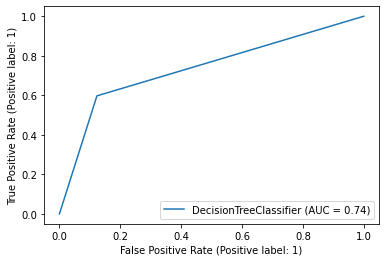

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve
dtClass=DecisionTreeClassifier()
dtClass.fit(x_train,y_train)
disp = plot_roc_curve(dtClass,x_test,y_test)

# Hyper parameter tuning

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [64]:
parameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}
rf_tuned = RandomForestClassifier(random_state=30)                   
rf_cv = RandomizedSearchCV(estimator=rf_tuned, param_distributions=parameters, cv=5, random_state=30)

In [65]:
rf_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=30)

In [66]:
rf_cv.best_score_

0.8562457024982809

In [67]:
rf_tuned = RandomForestClassifier(max_depth=95, n_estimators=142, random_state=30)
rf_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=95, n_estimators=142, random_state=30)

In [68]:
y_pred_rf_tuned = rf_tuned.predict(x_test)

In [69]:
accuracy_rf = round(accuracy_score(y_test, y_pred_rf_tuned) * 100, 3)
accuracy_rf

85.101

In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100,1000], 'kernel': ['linear']},
              {'C': [1, 10, 100,1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)

In [ ]:
accuracy = grid_search.best_score_
accuracy